<a href="https://colab.research.google.com/github/LagnajeetLJ/img_classification/blob/main/Copy_of_project_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import (
    Conv2D,#convolutional layer
    MaxPooling2D, #max pooling layer
    Flatten,#flattening the matrix 2d to 1d
    Dense,#neural nets
    Activation,# its a func
    BatchNormalization,#feature scaling
    Dropout#to avoid overfitting and increase accuracy of model
)


In [2]:
#defining the image properties
IMG_HEIGHT =130
IMG_WIDTH=130
IMG_SIZE=(IMG_HEIGHT,IMG_WIDTH)
IMG_CHANNELS=3
daisy_path=os.listdir('/content/drive/MyDrive/Project2Dataset/Daisy')
dandelion_path=os.listdir('/content/drive/MyDrive/Project2Dataset/Dandelion')
rose_path=os.listdir('/content/drive/MyDrive/Project2Dataset/Rose')
sunflower_path=os.listdir('/content/drive/MyDrive/Project2Dataset/Sunflower')
tulip_path=os.listdir('/content/drive/MyDrive/Project2Dataset/Tulip')

# New Section

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
len(daisy_path)

764

In [5]:
len(dandelion_path)

1062

In [6]:
len(rose_path)

804

In [7]:
len(sunflower_path)

755

In [8]:
len(tulip_path)

984

In [9]:
daisy_path[1]

'10994032453_ac7f8d9e2e.jpg'

In [10]:
dandelion_path[1]

'141340262_ca2e576490.jpg'

In [11]:
rose_path[1]

'12395698413_c0388278f7.jpg'

In [12]:
daisy='/content/drive/MyDrive/Project2Dataset/Daisy'
dandelion='/content/drive/MyDrive/Project2Dataset/Dandelion'
rose='/content/drive/MyDrive/Project2Dataset/Rose'
sunflower='/content/drive/MyDrive/Project2Dataset/Sunflower'
tulip='/content/drive/MyDrive/Project2Dataset/Tulip'

In [13]:
f'{daisy}/{daisy_path[0]}'#to convert each img into matrix

'/content/drive/MyDrive/Project2Dataset/Daisy/11023277956_8980d53169_m.jpg'

In [14]:
pixel_matrix=plt.imread(f'{daisy}/{daisy_path[0]}')

In [15]:
pixel_matrix

array([[[  5,   1,   0],
        [  5,   1,   0],
        [  5,   1,   0],
        ...,
        [134, 122,  96],
        [128, 119,  90],
        [124, 113,  83]],

       [[  5,   1,   0],
        [  5,   1,   0],
        [  5,   1,   0],
        ...,
        [228, 215, 198],
        [226, 215, 197],
        [228, 217, 197]],

       [[  5,   1,   0],
        [  5,   1,   0],
        [  3,   2,   0],
        ...,
        [246, 232, 223],
        [246, 237, 230],
        [243, 234, 227]],

       ...,

       [[  4,   2,   3],
        [  4,   2,   3],
        [  4,   2,   3],
        ...,
        [238, 229, 224],
        [241, 234, 228],
        [243, 238, 234]],

       [[  4,   2,   3],
        [  4,   2,   3],
        [  4,   2,   3],
        ...,
        [241, 232, 227],
        [240, 233, 227],
        [243, 235, 232]],

       [[  4,   2,   3],
        [  4,   2,   3],
        [  4,   2,   3],
        ...,
        [243, 234, 229],
        [240, 233, 227],
        [241, 233, 230]]

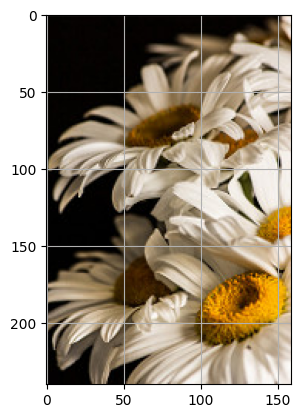

In [16]:
plt.imshow(pixel_matrix)
plt.grid()

In [17]:
f'{dandelion}/{dandelion_path[0]}'#to convert each img into matrix

'/content/drive/MyDrive/Project2Dataset/Dandelion/14076873230_d0bd53b220.jpg'

In [18]:
f'{rose}/{rose_path[0]}'

'/content/drive/MyDrive/Project2Dataset/Rose/12202373204_34fb07205b.jpg'

In [19]:
f'{sunflower}/{sunflower_path[0]}'

'/content/drive/MyDrive/Project2Dataset/Sunflower/1217254584_4b3028b93d.jpg'

In [20]:
f'{tulip}/{tulip_path[0]}'

'/content/drive/MyDrive/Project2Dataset/Tulip/11746548_26b3256922_n.jpg'

In [21]:
batch_size = 128

In [22]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Project2Dataset',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['Daisy','Dandelion','Rose','Sunflower','Tulip'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 4369 images belonging to 5 classes.


In [23]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [25]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [26]:
total_sample=train_generator.n

In [29]:
n_epochs = 30

In [31]:
history = model.fit(
        train_generator,
        steps_per_epoch=int(total_sample/batch_size),
        epochs=n_epochs,
        verbose='progress')

Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


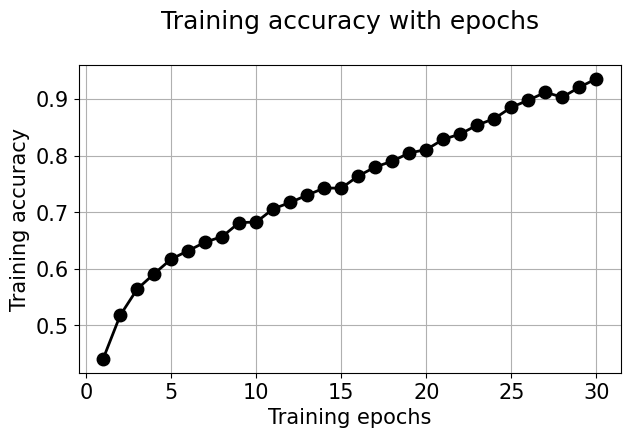

In [32]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

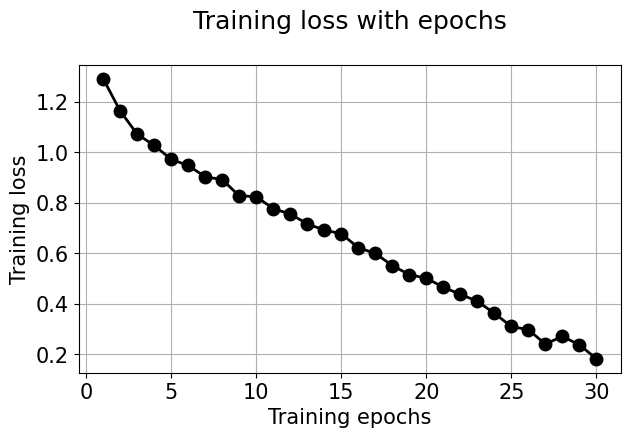

In [33]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [34]:
def train_CNN(train_directory,target_size=(200,200), classes=None,
              batch_size=128,num_epochs=20,num_classes=5,verbose=0):



    # ImageDataGenerator object instance with scaling
    train_datagen = ImageDataGenerator(rescale=1/255)

    # Flow training images in batches using the generator
    train_generator = train_datagen.flow_from_directory(
            train_directory,  # This is the source directory for training images
            target_size=target_size,  # All images will be resized to 200 x 200
            batch_size=batch_size,
            # Specify the classes explicitly
            classes = classes,
            # Since we use categorical_crossentropy loss, we need categorical labels
            class_mode='categorical')

    input_shape = tuple(list(target_size)+[3])

    # Model architecture
    model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 512 neuron in the fully-connected layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Optimizer and compilation
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

    # Total sample count
    total_sample=train_generator.n

    # Training
    model.fit(
        train_generator,
        steps_per_epoch=int(total_sample/batch_size),
        epochs=num_epochs,
        verbose=verbose)

    return model

In [35]:
train_directory ="/content/drive/MyDrive/Project2Dataset"

In [36]:
model_caltech101 = train_CNN(
    train_directory=train_directory,
    classes=['Daisy', 'Dandelion'],
    batch_size=4,
    num_epochs=25,
    num_classes=2,
    verbose=1
)


Found 1826 images belonging to 2 classes.
Epoch 1/25
456/456 [==============================] - 116s 252ms/step - loss: 0.5977 - acc: 0.7097
Epoch 2/25
456/456 [==============================] - 96s 210ms/step - loss: 0.4073 - acc: 0.8326
Epoch 3/25
456/456 [==============================] - 97s 213ms/step - loss: 0.3460 - acc: 0.8513
Epoch 4/25
456/456 [==============================] - 96s 210ms/step - loss: 0.3101 - acc: 0.8825
Epoch 5/25
456/456 [==============================] - 100s 220ms/step - loss: 0.3001 - acc: 0.8919
Epoch 6/25
456/456 [==============================] - 94s 206ms/step - loss: 0.2741 - acc: 0.9072
Epoch 7/25
456/456 [==============================] - 95s 209ms/step - loss: 0.2415 - acc: 0.9182
Epoch 8/25
456/456 [==============================] - 98s 215ms/step - loss: 0.2118 - acc: 0.9270
Epoch 9/25
456/456 [==============================] - 96s 211ms/step - loss: 0.1940 - acc: 0.9374
Epoch 10/25
456/456 [==============================] - 100s 219ms/step - l

In [37]:
import matplotlib.image as mpimg

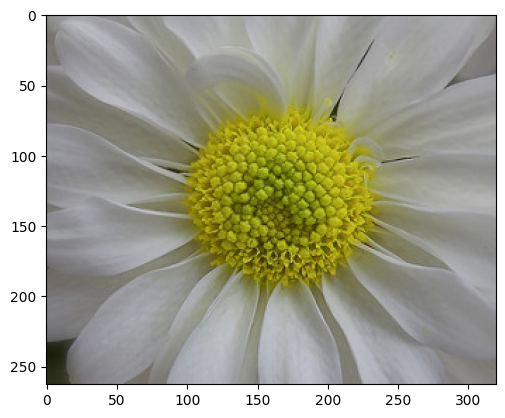

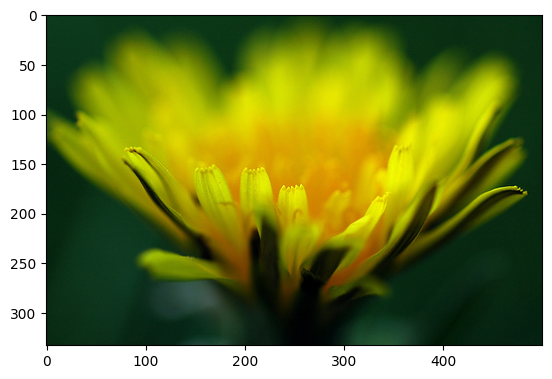

In [38]:
img_path = '/content/drive/MyDrive/Project2Dataset/Daisy/100080576_f52e8ee070_n.jpg'
img_daisy = mpimg.imread(img_path)
plt.imshow(img_daisy)
plt.show()

img_path = '/content/drive/MyDrive/Project2Dataset/Dandelion/141340262_ca2e576490.jpg'
img_dandelion = mpimg.imread(img_path)
plt.imshow(img_dandelion)
plt.show()
#img_path = '/content/drive/MyDrive/Project2Dataset/Tulip/100930342_92e8746431_n.jpg'
#img_tulip = mpimg.imread(img_path)
#plt.imshow(img_tulip)
#plt.show()

In [39]:
from PIL import Image

In [40]:
img_daisy=Image.open('/content/drive/MyDrive/Project2Dataset/Daisy/100080576_f52e8ee070_n.jpg')
img_dandelion=Image.open('/content/drive/MyDrive/Project2Dataset/Dandelion/141340262_ca2e576490.jpg')
#img_tulip=Image.open('/content/drive/MyDrive/Project2Dataset/Tulip/100930342_92e8746431_n.jpg')

In [41]:
img_daisy = img_daisy.resize((200,200))
img_dandelion = img_dandelion.resize((200,200))
#img_tulip = img_tulip.resize((200,200))

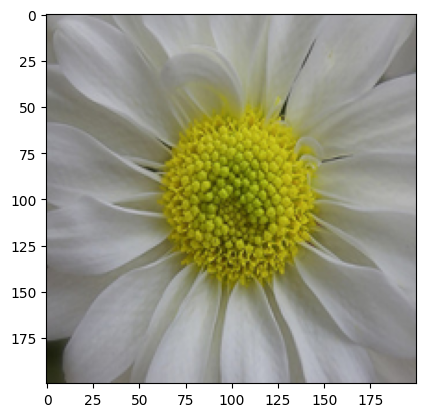

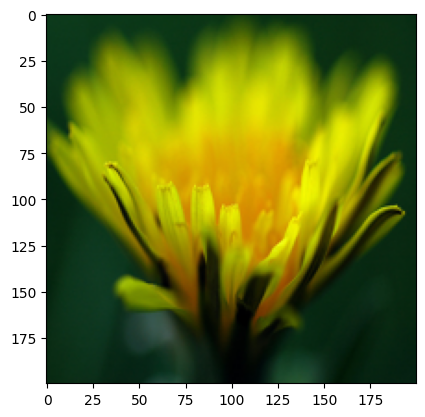

In [42]:
plt.imshow(img_daisy)
plt.show()

plt.imshow(img_dandelion)
plt.show()

#plt.imshow(img_tulip)
#plt.show()

In [43]:
img_daisy=np.expand_dims(img_daisy,axis=0)
img_dandelion=np.expand_dims(img_dandelion,axis=0)
#img_tulip=np.expand_dims(img_tulip,axis=0)

In [44]:
model_caltech101.predict(img_daisy)

1/1 [==============================] - 0s 262ms/step


array([[0., 1.]], dtype=float32)